In [35]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [36]:
# ==============================
# COLAB DATASET FAST SETUP CELL
# ==============================

import os
import zipfile
from google.colab import drive

# -------- USER CHANGE THIS --------
DRIVE_ZIP_PATH = "/content/drive/MyDrive/Colab Notebooks/Attr2Face/img_align_celeba.zip"
# ----------------------------------

LOCAL_ZIP_PATH = "/content/celeba.zip"
EXTRACT_PATH = "/content"

print("Mounting Google Drive...")
drive.mount('/content/drive')

print("\nChecking dataset in Drive...")
if not os.path.exists(DRIVE_ZIP_PATH):
    raise FileNotFoundError(f"Dataset not found at: {DRIVE_ZIP_PATH}")

print("Dataset found in Drive ✓")

print("\nCopying dataset to fast local storage (/content)...")
os.system(f"cp '{DRIVE_ZIP_PATH}' '{LOCAL_ZIP_PATH}'")

print("Copy complete ✓")

print("\nExtracting dataset...")
with zipfile.ZipFile(LOCAL_ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

print("Extraction complete ✓")

print("\nVerifying extracted files...")
print(os.listdir("/content")[:10])

# ===== READY TO USE ROOT PATH =====
root = "/content"

print("\nDataset ready for training.")
print("Use root =", root)

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Checking dataset in Drive...
Dataset found in Drive ✓

Copying dataset to fast local storage (/content)...
Copy complete ✓

Extracting dataset...
Extraction complete ✓

Verifying extracted files...
['.config', 'celeba.zip', 'drive', 'list_attr_celeba.txt', 'img_align_celeba', 'sample_data']

Dataset ready for training.
Use root = /content


In [37]:
!cp "/content/drive/MyDrive/Colab Notebooks/Attr2Face/list_attr_celeba.txt" /content/

!ls /content | grep celeba

celeba.zip
img_align_celeba
list_attr_celeba.txt


In [38]:
DATA_ROOT = "/content"   

IMG_DIR = os.path.join(DATA_ROOT, "img_align_celeba")
ATTR_PATH = os.path.join(DATA_ROOT, "list_attr_celeba.txt")

In [39]:
attr_df = pd.read_csv(
    ATTR_PATH,
    sep=r"\s+",
    skiprows=1
)

# Convert -1 → 0
attr_df = attr_df.replace(-1, 0)

# Set index = image filename
attr_df.index.name = "image"

print(attr_df.shape)
attr_df.head()

(202599, 40)


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [40]:
print("Total attribute rows:", len(attr_df))

image_files = os.listdir(IMG_DIR)
print("Total images:", len(image_files))

Total attribute rows: 202599
Total images: 202599


In [41]:
selected_attrs = [
    "Smiling",
    "Eyeglasses",
    "Male"
]

attr_small = attr_df[selected_attrs]
attr_small.head()

,Smiling,Eyeglasses,Male
image,,,
000001.jpg,1,0,0
000002.jpg,1,0,0
000003.jpg,0,0,1
000004.jpg,0,0,0
000005.jpg,0,0,0


#### Attribute Distrubution

In [42]:
attr_small.mean()

,0
Smiling,0.482080
Eyeglasses,0.065119
Male,0.416754


In [43]:
def show_image_with_attr_ax(ax, img_name):
    img_path = os.path.join(IMG_DIR, img_name)
    img = Image.open(img_path).convert("RGB")
    
    attrs = attr_small.loc[img_name]

    ax.imshow(img)
    ax.set_title(str(attrs.to_dict()), fontsize=8)
    ax.axis("off")

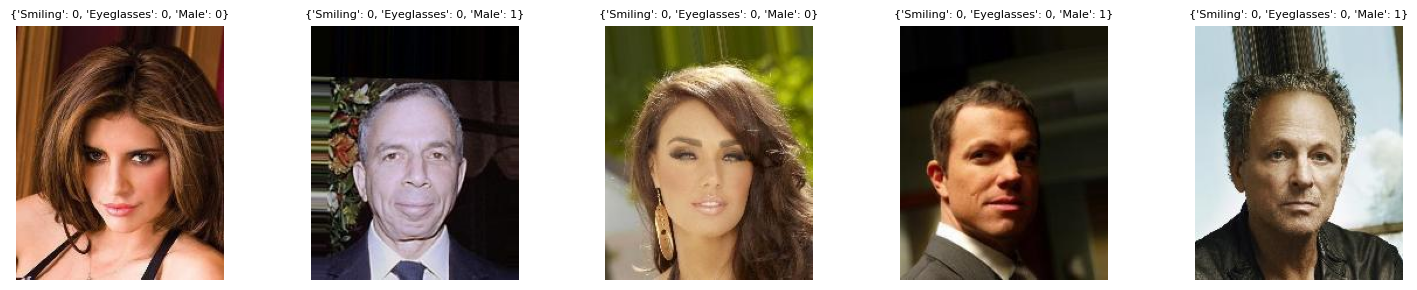

In [44]:
random_imgs = np.random.choice(attr_small.index, size=5)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for ax, img_name in zip(axes, random_imgs):
    show_image_with_attr_ax(ax, img_name)

plt.tight_layout()
plt.show()

In [45]:
# Check for missing files:
missing = [
    img for img in attr_small.index
    if not os.path.exists(os.path.join(IMG_DIR, img))
]

print("Missing files:", len(missing))

Missing files: 0


In [46]:
subset_df = attr_small.sample(10000, random_state=42)
subset_df.head()

,Smiling,Eyeglasses,Male
image,,,
093242.jpg,0,0,1
121414.jpg,0,0,0
010625.jpg,0,0,1
082524.jpg,1,0,0
073193.jpg,1,0,0


In [58]:
# local save
# subset_df.to_csv("subset_df.csv", index=True)

# colab upload
subset_df.to_csv("/content/subset_df.csv", index=True)

In [60]:
!ls /content

celeba.zip  img_align_celeba	  sample_data
drive	    list_attr_celeba.txt  subset_df.csv


### Building Training Ready Dataset Pipeline

In [48]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [49]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                         [0.5, 0.5, 0.5])
])

In [50]:
class CelebADataset(Dataset):
    def __init__(self, attr_df, img_dir, transform=None):
        self.attr_df = attr_df
        self.img_dir = img_dir
        self.transform = transform
        self.image_names = attr_df.index.tolist()

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = self.image_names[idx]
        img_path = os.path.join(self.img_dir, img_name)

        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        attrs = self.attr_df.loc[img_name].values
        attrs = torch.tensor(attrs, dtype=torch.float32)

        return image, attrs

In [51]:
dataset = CelebADataset(
    subset_df,
    IMG_DIR,
    transform
)

print(len(dataset))

10000


In [52]:
dataset

In [53]:
loader = DataLoader(
    dataset,
    batch_size=64,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

In [54]:
images, attrs = next(iter(loader))

print("Image shape:", images.shape)
print("Attr shape:", attrs.shape)
print(attrs[:5])

Image shape: torch.Size([64, 3, 64, 64])
Attr shape: torch.Size([64, 3])
tensor([[1., 1., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 0.]])


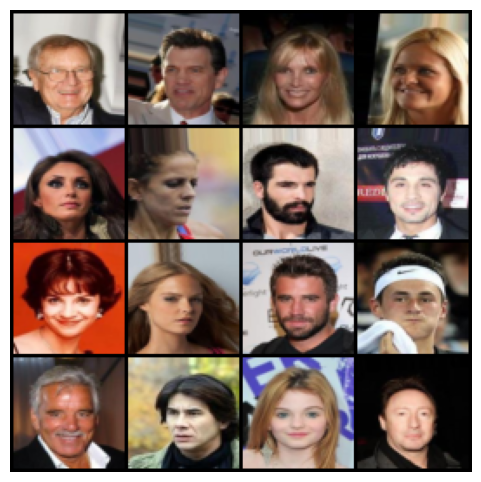

In [55]:
from torchvision.utils import make_grid

grid = images[:16] * 0.5 + 0.5  # denormalize

plt.figure(figsize=(6,6))
plt.imshow(
    torch.permute(
        make_grid(grid, nrow=4),
        (1,2,0)
    )
)
plt.axis("off")
plt.show()